In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
MAIN_PATH = "../data"

def return_significance(x):
    if x<0.001:
        return "**"
    elif x<0.01:
        return "*"
    return '-'


analysis_file = f"{MAIN_PATH}/papers_with_info_filtered5.parquet"
table = pd.read_parquet(analysis_file)
α = .05
label_mapping = {
    'mining': 'Data Mining',
    'ai': 'AI',
    'linguistic': 'NLP',
    'vision': 'Computer Vision',
    'information': 'Database',
    'hci': 'HCI',
    'average': 'Computer Science',
    'impactful': 'General Science'
}
areas = ['General Science','Computer Science','AI','HCI','NLP','Database','Data Mining','Computer Vision']

table.venue_area = table.venue_area.apply(lambda x: label_mapping[x] if x in label_mapping else "")


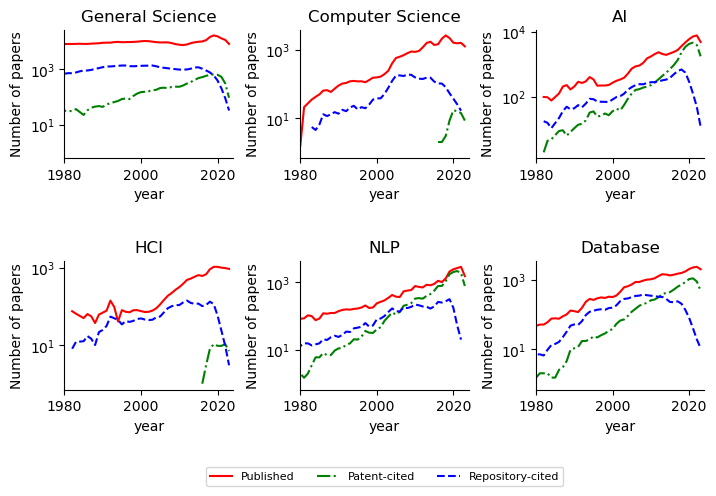

In [2]:
fig, axs = plt.subplots(2,3, figsize=(8, 4.5))

save_fig = False

window_size = 2
years = list(range(1980, 2024))
area_index = 0
for i in range(2):
    for j in range(3):
        area = areas[area_index]
        table[table.venue_area == area].groupby("year").count()["corpusid"].rolling(window=window_size).mean().plot(
            label="Published", c="red", ax=axs[i, j]
        )
        table[(table.venue_area == area)&table.year_min_development].groupby("year").count()['corpusid'].rolling(window=window_size).mean().plot(
            label=f"Patent-cited", c="green", ax=axs[i, j], style='-.',
        )
        table[(table.venue_area == area)&table.year_min_innovation].groupby("year").count()['corpusid'].rolling(window=window_size).mean().plot( 
            label="Repository-cited", c='blue', ax=axs[i, j], style='--'
        )
        sb.despine()
        if i == 1 and j ==1:
            legend = axs[i, j].legend(loc='lower center', bbox_to_anchor=(.5, -.75), 
                                      borderaxespad=0., ncol=3, fontsize=8)
            
        axs[i, j].set_title(area)
        axs[i, j].set_yscale('log')
        axs[i, j].set_ylabel('Number of papers')
        axs[i, j].set_xlim(1980, 2024)
        area_index += 1
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.8)
if save_fig:
    plt.savefig(f"../figures/citations_year_curves.pdf", bbox_inches='tight', dpi=300)